# AI/ML with Python: Sentiment Analysis

### Step1: Data Acquisition

#### Detail the process of gathering data for your chosen project. This could involve employing web scraping techniques or utilizing existing APIs to gather the needed information. Alternatively, you have the option to search for pre-existing datasets available online.

##### To find data for this Sentimental Analysis Quest, I looked for existing datasets online. I discovered a useful dataset called "Russian Troll Tweets" on Kaggle, available on GitHub. Using this ready-made dataset made the process easier and quicker.

In [1]:
## Initial Data Exploration
import pandas as pd
import os

# Load the Russian troll tweets dataset
folder_path = 'russian-troll-tweets-master/'

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Iterate through files in the folder
for i in range(1, 11):  # Assuming you have files up to tweet10.csv
    # Construct the file path
    file_path = os.path.join(folder_path, f'IRAhandle_tweets_{i}.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Concatenate the current DataFrame to the overall DataFrame
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# reassign concatenated_df to new_df
new_df = concatenated_df


/tmp/ipykernel_28064/2301145722.py:17: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_28064/2301145722.py:17: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Step 2: Data Processing and Cleaning

#### Outline the procedures for cleaning and processing your data, utilizing techniques like tokenization, bag of words, or word embeddings, which we have discussed previously. However, if you have developed your own unique methods for this purpose, feel free to implement them instead.

In [2]:
# Filter off dataframes without the "content" column
filtered_df = new_df.dropna(subset=['content'])

# Display the cleaned DataFrame
print(filtered_df.tail())

        external_author_id        author  \
2435337         2611151319  SEATTLE_POST   
2435338         2611151319  SEATTLE_POST   
2435339         2611151319  SEATTLE_POST   
2435340         2611151319  SEATTLE_POST   
2435341         2611151319  SEATTLE_POST   

                                                   content         region  \
2435337  Report: Facebook’s unmanned aircraft crashed i...  United States   
2435338  Mom’s great catch at Redmond skating rink http...  United States   
2435339  Inside the DEA: A chemist’s quest to identify ...  United States   
2435340  Seahawks opponent outlook: St. Louis Rams  #sp...  United States   
2435341           What to do if the power goes out  #local  United States   

        language     publish_date   harvested_date  following  followers  \
2435337  English  12/21/2016 2:11  12/21/2016 2:11       5074      17091   
2435338  English  12/21/2016 4:23  12/21/2016 4:24       5074      17091   
2435339  English  12/21/2016 9:23  12/21/201

In [3]:
columns_to_keep = ['content', 'followers', 'following']

# Create a new DataFrame with only the specified columns
cleaned_df = new_df[columns_to_keep].copy()

# Display the cleaned DataFrame
print(cleaned_df)

                                                   content  followers  \
0        "We have a sitting Democrat US Senator on tria...       9636   
1        Marshawn Lynch arrives to game in anti-Trump s...       9637   
2        Daughter of fallen Navy Sailor delivers powerf...       9637   
3        JUST IN: President Trump dedicates Presidents ...       9642   
4        19,000 RESPECTING our National Anthem! #StandF...       9645   
...                                                    ...        ...   
2435337  Report: Facebook’s unmanned aircraft crashed i...      17091   
2435338  Mom’s great catch at Redmond skating rink http...      17091   
2435339  Inside the DEA: A chemist’s quest to identify ...      17092   
2435340  Seahawks opponent outlook: St. Louis Rams  #sp...      12649   
2435341           What to do if the power goes out  #local      12649   

         following  
0             1052  
1             1054  
2             1054  
3             1062  
4             1050

In [8]:
# Further data cleaning using tokenization, lowercasing and punctation removal, stopword removal, stemming and short word filtering

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

data = cleaned_df
df = pd.DataFrame(data)

# to limit the dataframe due to insufficient ptocessing power for the 2m+ df rows
df = df.head(100000)

# Function for text processing
def process_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming (you can choose to include this or not)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

# Function to filter out 5-worded tweets
def filter_short_tweets(tokens):
    return len(tokens) > 5

# Apply text processing to the 'content' column
df['processed_content'] = df['content'].apply(process_text)

# Filter out 5-worded tweets
df = df[df['processed_content'].apply(filter_short_tweets)]

# Display the cleaned DataFrame
print(df[['content', 'processed_content', 'followers', 'following']])


                                               content  \
0    "We have a sitting Democrat US Senator on tria...   
1    Marshawn Lynch arrives to game in anti-Trump s...   
2    Daughter of fallen Navy Sailor delivers powerf...   
3    JUST IN: President Trump dedicates Presidents ...   
5    Dan Bongino: "Nobody trolls liberals better th...   
..                                                 ...   
995  Stragi naziste: Italia condanna, Berlino lasci...   
996  Dal dissesto idrogeologico allo sviluppo, a Ro...   
997  #Profumo approda a #Finmeccanica per finire l'...   
998  #MotoGP: Vinales è in forma Mondiale, Rossi&am...   
999  Via col voucher: gli irriducibili che giocano ...   

                                     processed_content  followers  following  
0    [sit, democrat, us, senat, trial, corrupt, bar...       9636       1052  
1    [marshawn, lynch, arriv, game, shirt, judg, sa...       9637       1054  
2    [daughter, fallen, navi, sailor, deliv, power,...       9637 

### Sentiment Analysis Implementation

#### Use Python libraries (like NLTK, TextBlob, or others) to perform sentiment analysis.

In [9]:
# Using nltk
nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function for sentiment analysis
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']
    
    # Classify as positive, negative, or neutral based on the compound score
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'content' column
df['sentiment'] = df['content'].apply(analyze_sentiment)

# Display the DataFrame with sentiment analysis results
print(df[['content', 'processed_content', 'sentiment', 'followers', 'following']])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/j3ech/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               content  \
0    "We have a sitting Democrat US Senator on tria...   
1    Marshawn Lynch arrives to game in anti-Trump s...   
2    Daughter of fallen Navy Sailor delivers powerf...   
3    JUST IN: President Trump dedicates Presidents ...   
5    Dan Bongino: "Nobody trolls liberals better th...   
..                                                 ...   
995  Stragi naziste: Italia condanna, Berlino lasci...   
996  Dal dissesto idrogeologico allo sviluppo, a Ro...   
997  #Profumo approda a #Finmeccanica per finire l'...   
998  #MotoGP: Vinales è in forma Mondiale, Rossi&am...   
999  Via col voucher: gli irriducibili che giocano ...   

                                     processed_content sentiment  followers  \
0    [sit, democrat, us, senat, trial, corrupt, bar...   Neutral       9636   
1    [marshawn, lynch, arriv, game, shirt, judg, sa...   Neutral       9637   
2    [daughter, fallen, navi, sailor, deliv, power,...  Negative  

### Results Visualization

#### Present the outcomes in formats that are straightforward and easy to comprehend, like using charts or graphs. You can achieve this through tools like Matplotlib, as we explored in the previous quest.

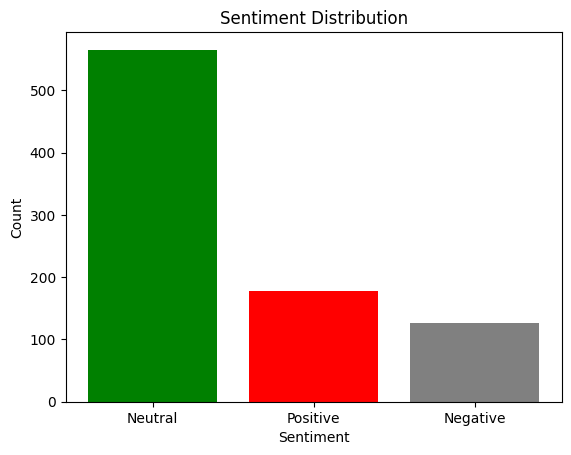

In [10]:
# Visualization
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In my project, I looked at tweets from a group of Russian troll accounts to figure out if the tweets were positive, negative, or neutral. I got this set of tweets from the internet, specifically Kaggle, where people share datasets. I found the dataset on GitHub.
Before I could analyze the tweets, I had to clean up the data. I used a tool called NLTK to help me with this. It helped me break down the tweets into smaller parts, remove unimportant words, and make everything more straightforward.
Once the data was ready, I used NLTK again to analyze the sentiment of each tweet. Sentiment is like the mood of the text, whether it's happy, sad, or just neutral. I then showed the results in a simple bar chart using Matplotlib. This chart helped me see how many tweets were positive, negative, or neutral.

I would like to express my gratitude to ChatGPT for assisting me throughout this project. ChatGPT provided me with valuable guidance and less stress wit handling bugs and error messages.
Additionally, I extend my thanks to [FiveThirtyEight](https://github.com/fivethirtyeight/russian-troll-tweets) the owner of the dataset repository on GitHub, for sharing the Russian troll tweets dataset

In a nutshell, I explored tweets from Russian troll accounts, cleaned up the data, figured out if the tweets were happy or sad, and then made a chart to show the results. It's like trying to understand the feelings behind the words people write online!